In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')
import palettable
%matplotlib inline

In [2]:
wvgem09, flgem09=np.loadtxt('gemini09.txt', unpack=True)

In [25]:
def linefit(inwave=wvgem09, influx=flgem09, inname='gem09', ntrials=5000,range1=[4800, 4850], range2=[5060, 5150], linerange=[4964, 5058], d_reg=25, DoPlot=True):
    
    wavelength=inwave
    flux=influx


    allfluxval=[()]
    
    
    for i in range(0,ntrials):
        
        #setting ranges for where continuum is featureless above and below emission line
        lowlim=range1[0]
        uplim=range1[1]
        
        lowlim2=range2[0]
        uplim2=range2[1]

        #setting range for emission line
        line1=linerange[0]
        line2=linerange[1]
        
        ##picking a random value to calculate continuum flux from
        ##let's randomly resample %d_reg angstrom size bins 
        cont_1=np.random.randint(lowlim, uplim, 1 )
        cont_2=cont_1+d_reg
        
        cont_3=np.random.randint(lowlim2, uplim2, 1)
        cont_4=cont_3+d_reg
    

        ##setting two regions to calculate the average continuum flux
        reg_1=np.where((wavelength>cont_1)&(wavelength<cont_2))
        reg_2=np.where((wavelength>cont_3)&(wavelength<cont_4))
        
        #line region
        reg_line=np.where((wavelength>line1)&(wavelength<line2))
        
        #continuum flux before and after emission line
        cont2=np.average(flux[reg_2])
        cont1=np.average(flux[reg_1])
       
    
        ##fitting a straight line to the region with line emission
        x1=line1
        x2=line2
        y1=cont1
        y2=cont2
        m = (y2-y1)/(x2-x1)
        b=y2-(m*x2)
        xnew=wavelength[reg_line]
        ynew=m*xnew+b
        
        
        ##setting the plot ylimits
        offset=(np.min(flux[reg_line])+np.min(flux[reg_line]))/2
        
        pltlowlim=np.min(flux[reg_line])-(offset/2)
        plthiglim=np.min(flux[reg_line])+(1.5*offset)
        pltxlowlim=x1-275
        pltxhiglim=x2+275
        
 
        if DoPlot:
            ##!!only make one plot!!
            if np.size(allfluxval)<1:

                plt.figure(figsize=(10,8))
                plt.plot(wavelength, flux, '--', lw=2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[6], zorder=10, label=inname)
                
                ##plotting all the various regions
                plt.axvline(x=line1, color=palettable.cubehelix.cubehelix3_16.mpl_colors[10], lw=2)
                plt.axvline(x=line2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[10], lw=2)
    

                plt.axvline(x=cont_1, color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], lw=2)
                plt.axvline(x=cont_2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], lw=2)
                plt.axvspan(cont_3, cont_4, color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], alpha=0.25)
                plt.axvline(x=cont_3, color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], lw=2)
                plt.axvline(x=cont_4, color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], lw=2)
                plt.axvspan(cont_1, cont_2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[8], alpha=0.25, label='randomly sampled region')
                plt.axvspan(line1, line2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[10], alpha=0.25, label='emission line region')
                
                
                plt.axvspan(lowlim, uplim+d_reg, color=palettable.cubehelix.cubehelix3_16.mpl_colors[5], alpha=0.15)

                plt.axvspan(lowlim2, uplim2+d_reg, color=palettable.cubehelix.cubehelix3_16.mpl_colors[5], alpha=0.15, label='featureless region')

                plt.plot(xnew, ynew,  color=palettable.cubehelix.cubehelix3_16.mpl_colors[3], zorder=20, lw=4, label='best fit line' )
                plt.axvline(x=lowlim, color=palettable.cubehelix.cubehelix3_16.mpl_colors[5], linestyle='--', lw=2)
                plt.axvline(x=uplim+d_reg, color=palettable.cubehelix.cubehelix3_16.mpl_colors[5], linestyle='--', lw=2)
                plt.axvline(x=uplim2+d_reg, color=palettable.cubehelix.cubehelix3_16.mpl_colors[5],linestyle='--', lw=2)
                plt.axvline(x=lowlim2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[5], linestyle='--', lw=2)
                plt.axhline(y=cont1, color=palettable.cubehelix.cubehelix3_16.mpl_colors[12], lw=2)
                plt.axhline(y=cont2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[12], lw=2)
                plt.axhspan(cont1, cont2, color=palettable.cubehelix.cubehelix3_16.mpl_colors[12], alpha=0.25, label='fit continuum region')
                
                plt.xlim(pltxlowlim, pltxhiglim)
                plt.ylim(pltlowlim, plthiglim)
                plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                fname='cont_line_%s.pdf' %inname
                plt.xlabel('Wavelength (Angstrom)')
                plt.ylabel('Flux (Arbitrary Units)')
                plt.savefig(fname)

        ##calculating equivalent width
        d_lambda= wavelength[1]-wavelength[0]
        eq_wid=np.sum(1-(flux[reg_line]/ynew))*d_lambda
        
        ##gathering up all the trials together
        if np.size(allfluxval)<1:
            allfluxval=eq_wid
        else:
            allfluxval=np.hstack((allfluxval, eq_wid))
            
    
  
    ##taking average and standard deviation
    avg=np.average(allfluxval)
    std=np.std(allfluxval)
    
    
    
    return avg, std

-35.0708412723 1.33525789478


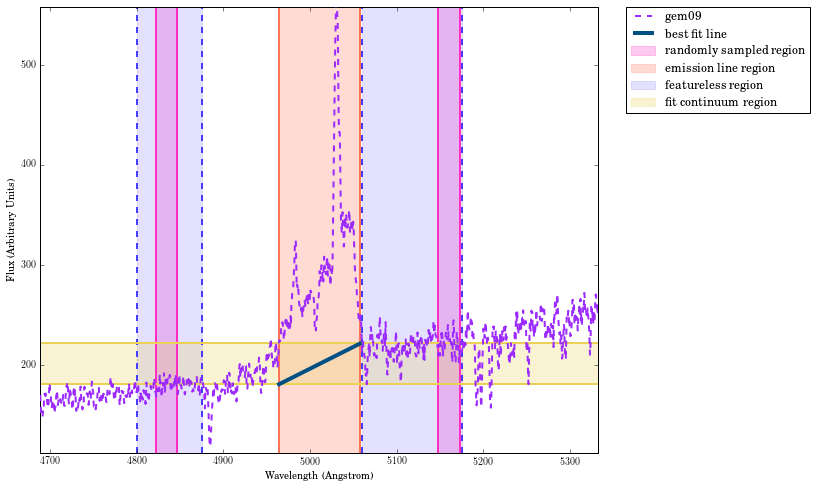

In [26]:
eq_wid, err=linefit()

#multiplying by 3/4 because this example is [OIII] with a 3:1 ratio, and we only want equivalent width in the 5007 region.

print 0.75*eq_wid, 0.75*err